# **Import Libraries**

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



# **Download Stock Data**

In [9]:
# Define stock symbol and time period
stock_symbol = "AAPL"  # Apple stock
start_date = "2023-01-01"
end_date = "2024-01-01"

# Fetch data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display first 5 rows
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632545  129.395534  122.742888  128.782665  112117500
2023-01-04  124.907715  127.181283  123.642427  125.431622   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130234  128.792531  123.454601  124.561732   87754700
2023-01-09  128.654129  131.876670  128.397123  128.970458   70790800


## **Data Cleaning & Processing**

In [12]:
#Check for missng values

print(stock_data.isnull().sum())

#fill missing values using forward fill method

stock_data.fillna(method='ffill', inplace= True)

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


<ipython-input-12-ec23bffab68c>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace= True)


# **Plot Stock Closing Price**

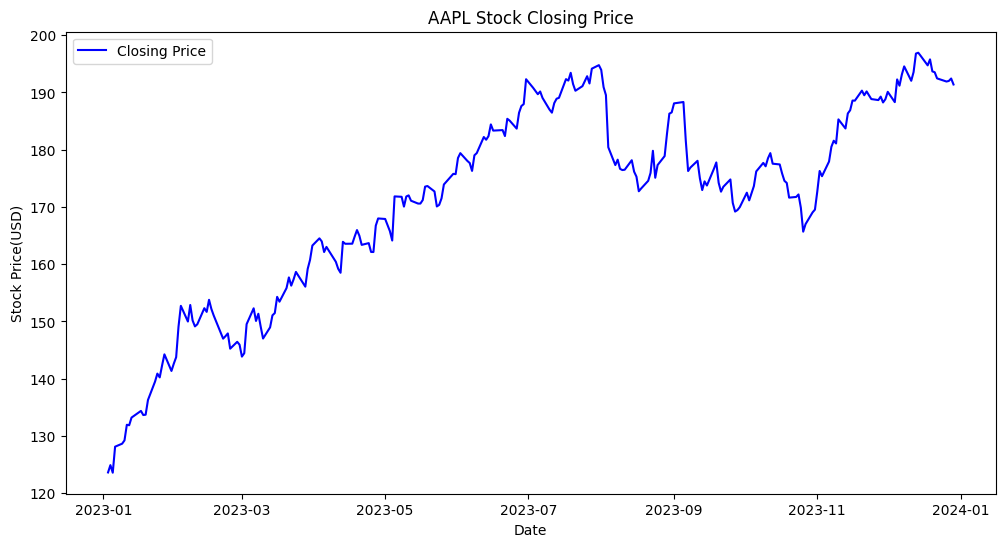

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price(USD)')
plt.title(f'{stock_symbol} Stock Closing Price')
plt.legend()
plt.show()

# **Calculate Moving Averages (SMA & EMA)**

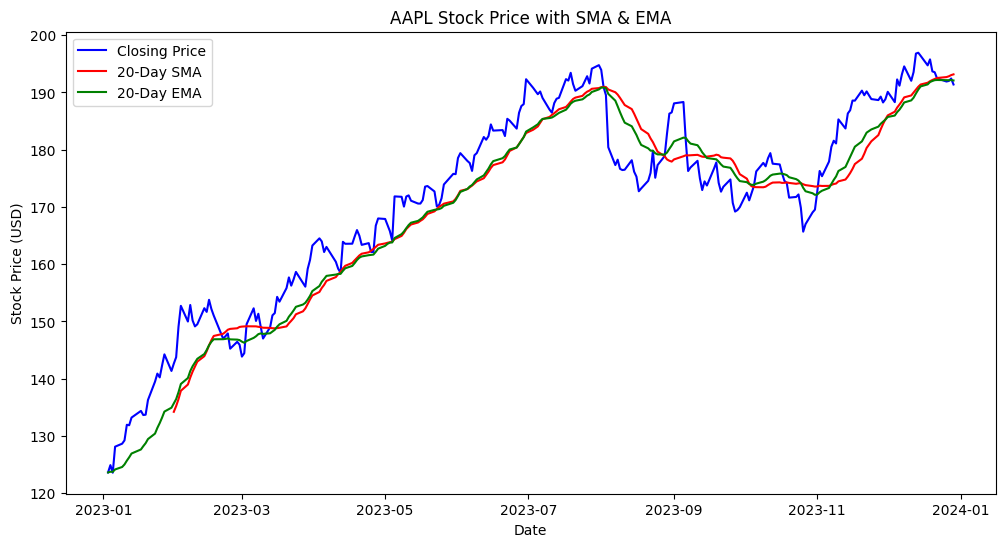

In [14]:
# Define moving average window size
window = 20  # 20-day moving average

# Calculate SMA & EMA
stock_data['SMA'] = stock_data['Close'].rolling(window=window).mean()
stock_data['EMA'] = stock_data['Close'].ewm(span=window, adjust=False).mean()

# Plot Closing Price & Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label="Closing Price", color='blue')
plt.plot(stock_data.index, stock_data['SMA'], label=f"{window}-Day SMA", color='red')
plt.plot(stock_data.index, stock_data['EMA'], label=f"{window}-Day EMA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{stock_symbol} Stock Price with SMA & EMA")
plt.legend()
plt.show()


# **Compute Daily Returns**

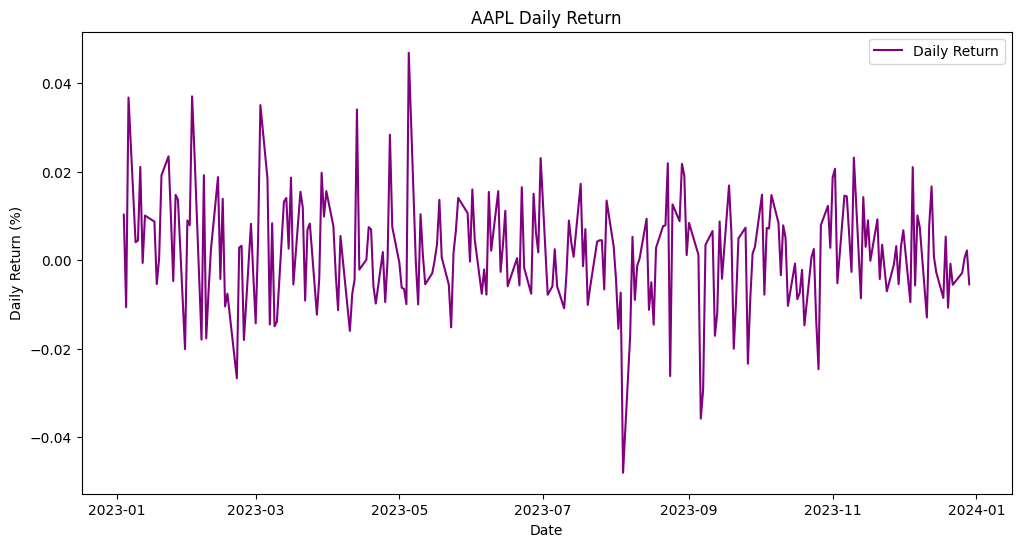

In [15]:
# Compute daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Daily Return'], label="Daily Return", color='purple')
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title(f"{stock_symbol} Daily Return")
plt.legend()
plt.show()


# **Calculate Stock Volatility**

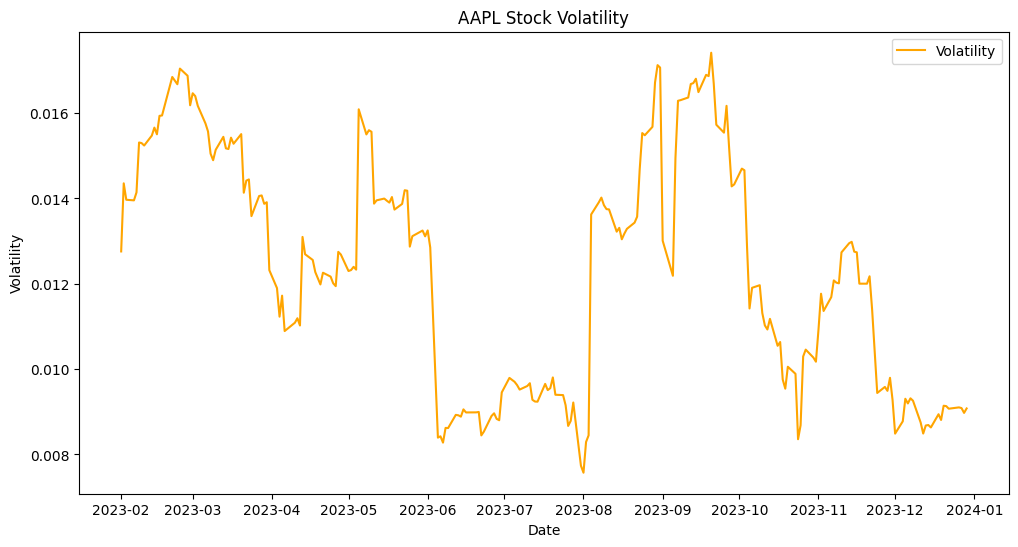

In [16]:
# Compute rolling standard deviation (volatility)
volatility_window = 20  # 20-day volatility
stock_data['Volatility'] = stock_data['Daily Return'].rolling(volatility_window).std()

# Plot Stock Volatility
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Volatility'], label="Volatility", color='orange')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title(f"{stock_symbol} Stock Volatility")
plt.legend()
plt.show()


# **Save Processed Data**



In [17]:
# Save the cleaned dataset for future use
stock_data.to_csv(f"{stock_symbol}_Stock_Data.csv")
print("File Saved Successfully!")


File Saved Successfully!
